In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv", 
                 index_col = ["date", "iso_code"], 
                 parse_dates = True)
df.rename(columns = {col:col.replace("_", " ").title() for col in df}, 
                     inplace = True)
countries = df.groupby("iso_code").mean().index

countries2 = df.groupby(["iso_code", "Location"]).mean().index
iso_to_country = dict(countries2)

In [2]:
keys = list(df.keys())[4:]
keys.remove("Tests Units")


In [3]:
list(df.keys())

['Continent',
 'Location',
 'Total Cases',
 'New Cases',
 'New Cases Smoothed',
 'Total Deaths',
 'New Deaths',
 'New Deaths Smoothed',
 'Total Cases Per Million',
 'New Cases Per Million',
 'New Cases Smoothed Per Million',
 'Total Deaths Per Million',
 'New Deaths Per Million',
 'New Deaths Smoothed Per Million',
 'Reproduction Rate',
 'Icu Patients',
 'Icu Patients Per Million',
 'Hosp Patients',
 'Hosp Patients Per Million',
 'Weekly Icu Admissions',
 'Weekly Icu Admissions Per Million',
 'Weekly Hosp Admissions',
 'Weekly Hosp Admissions Per Million',
 'Total Tests',
 'New Tests',
 'Total Tests Per Thousand',
 'New Tests Per Thousand',
 'New Tests Smoothed',
 'New Tests Smoothed Per Thousand',
 'Positive Rate',
 'Tests Per Case',
 'Tests Units',
 'Total Vaccinations',
 'People Vaccinated',
 'People Fully Vaccinated',
 'Total Boosters',
 'New Vaccinations',
 'New Vaccinations Smoothed',
 'Total Vaccinations Per Hundred',
 'People Vaccinated Per Hundred',
 'People Fully Vaccinated P

In [4]:
pivot_df = {}
for key in keys:
    pivot_df[key] = pd.pivot_table(df.reset_index(), 
                                   values=[key],
                                   index=['date'],
                                   columns=['iso_code'])
    pivot_df[key] = pivot_df[key].T.reset_index().set_index("iso_code")
    drop_key = list(pivot_df.keys())[0]
    del pivot_df[key]["level_0"]
    pivot_df[key] = pivot_df[key].T 
    

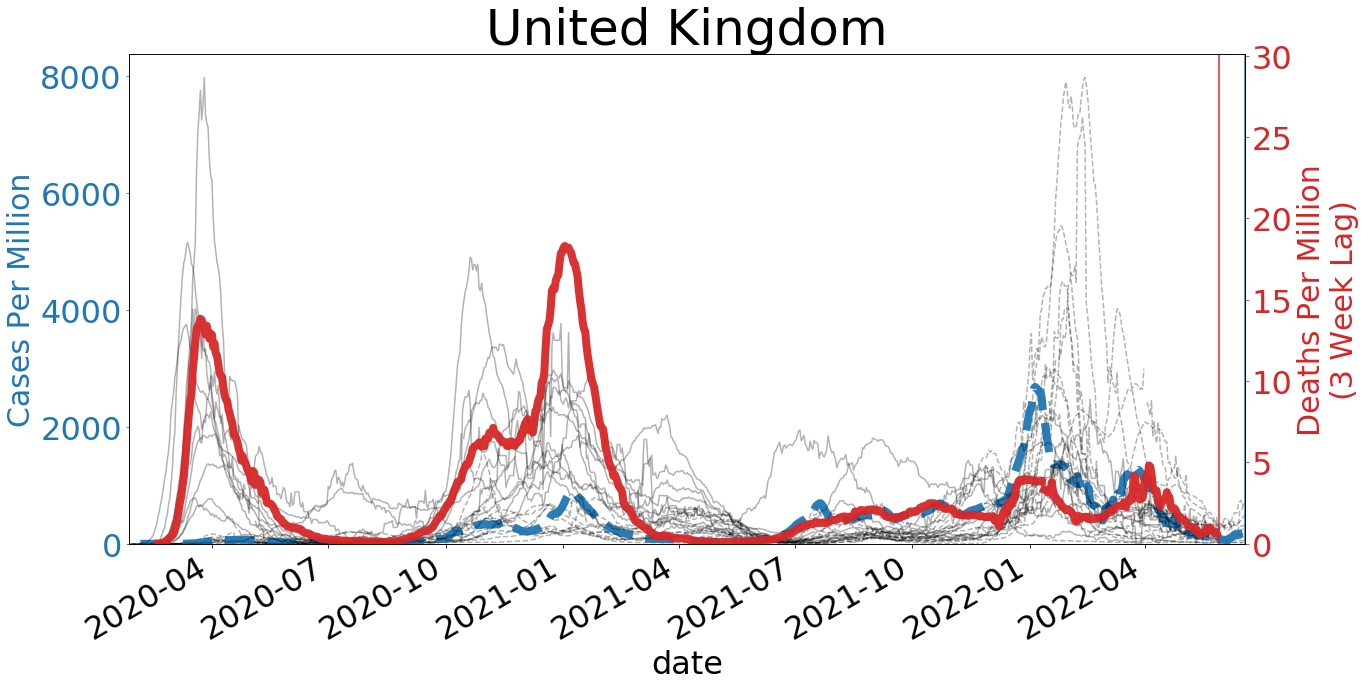

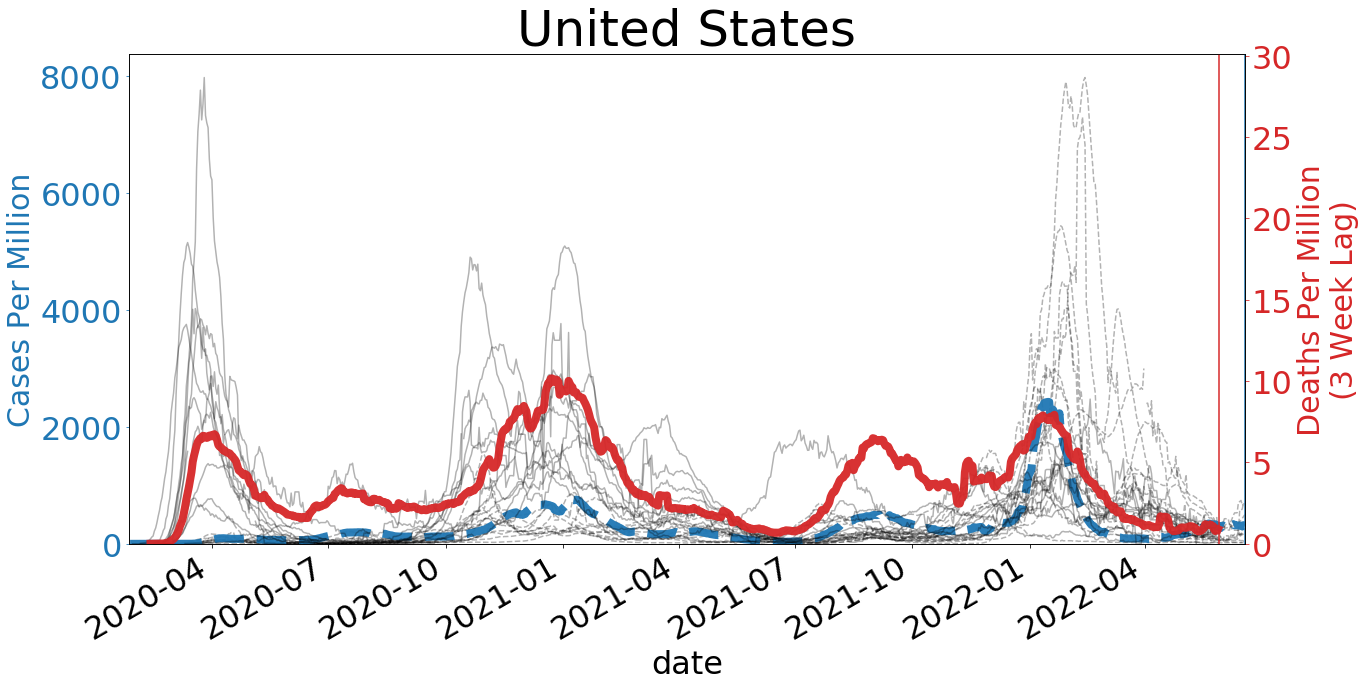

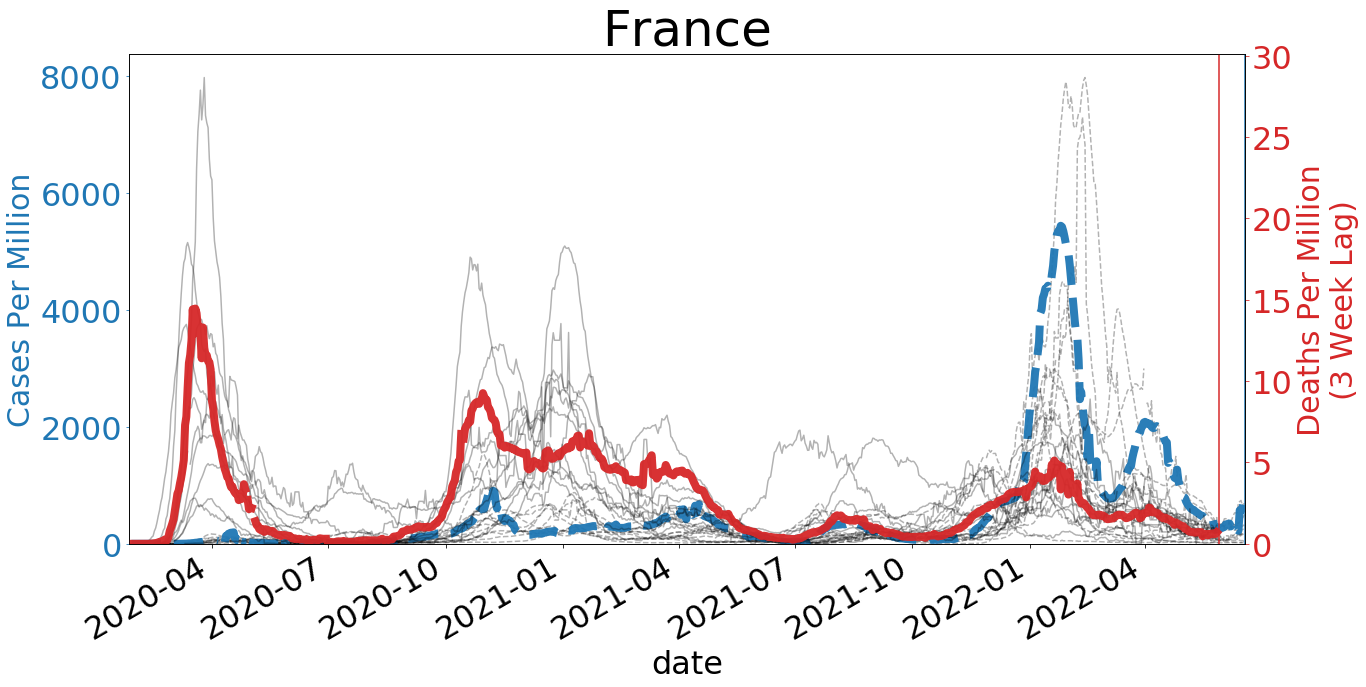

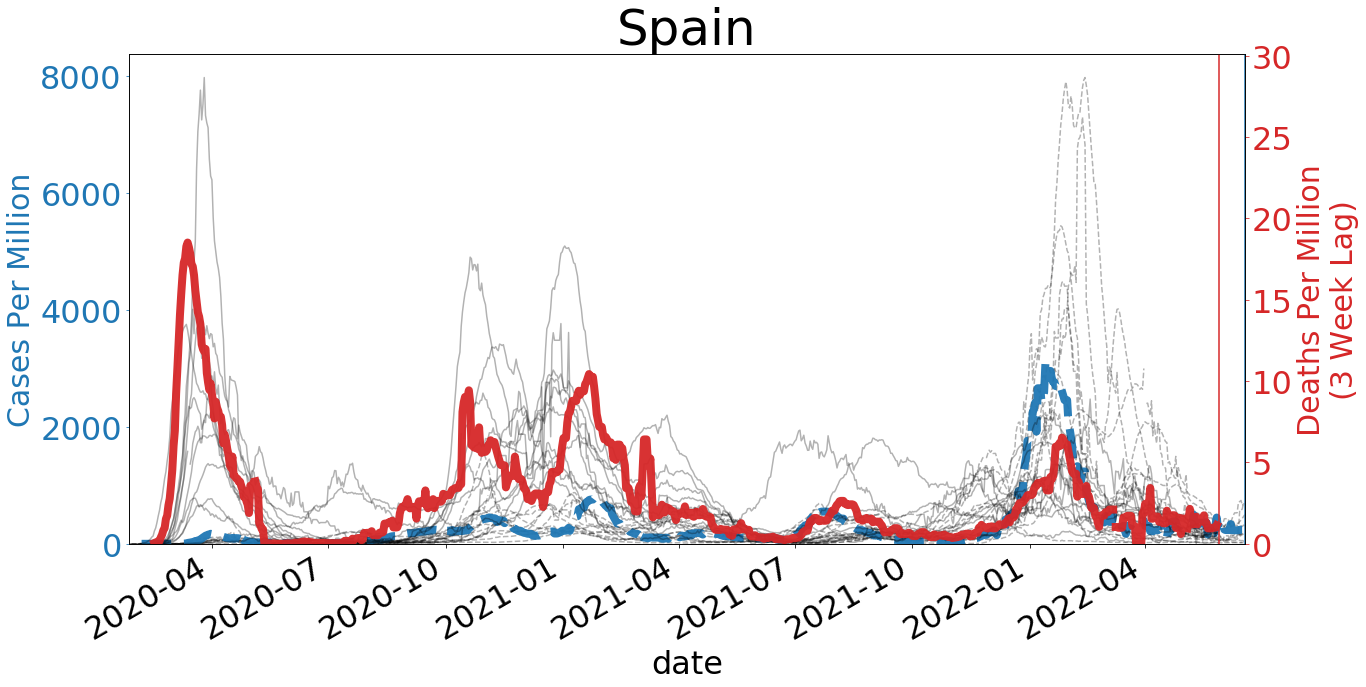

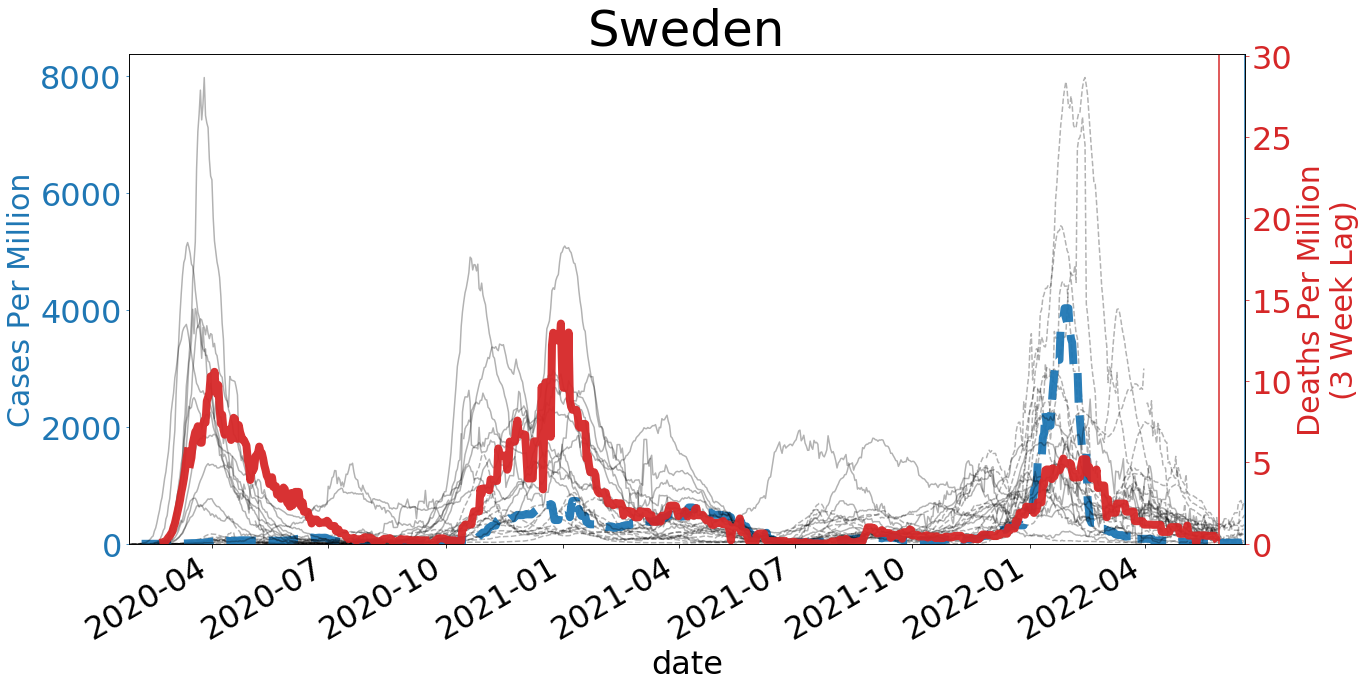

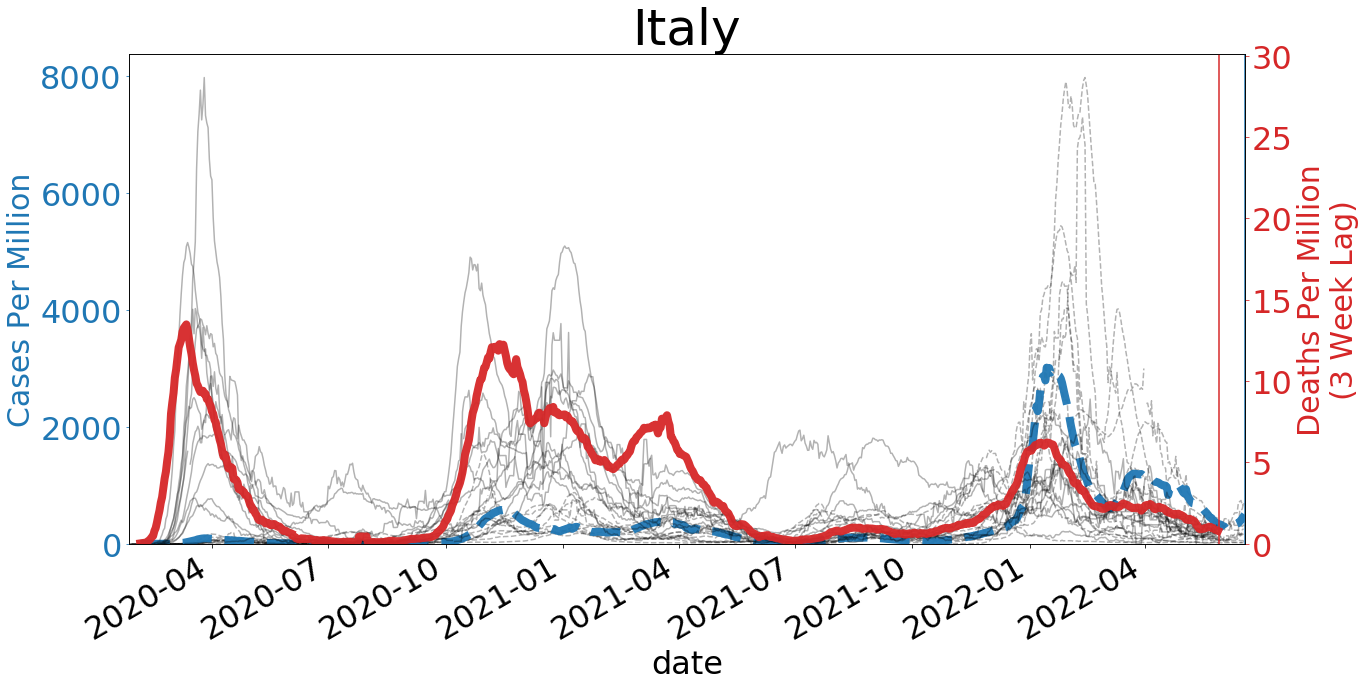

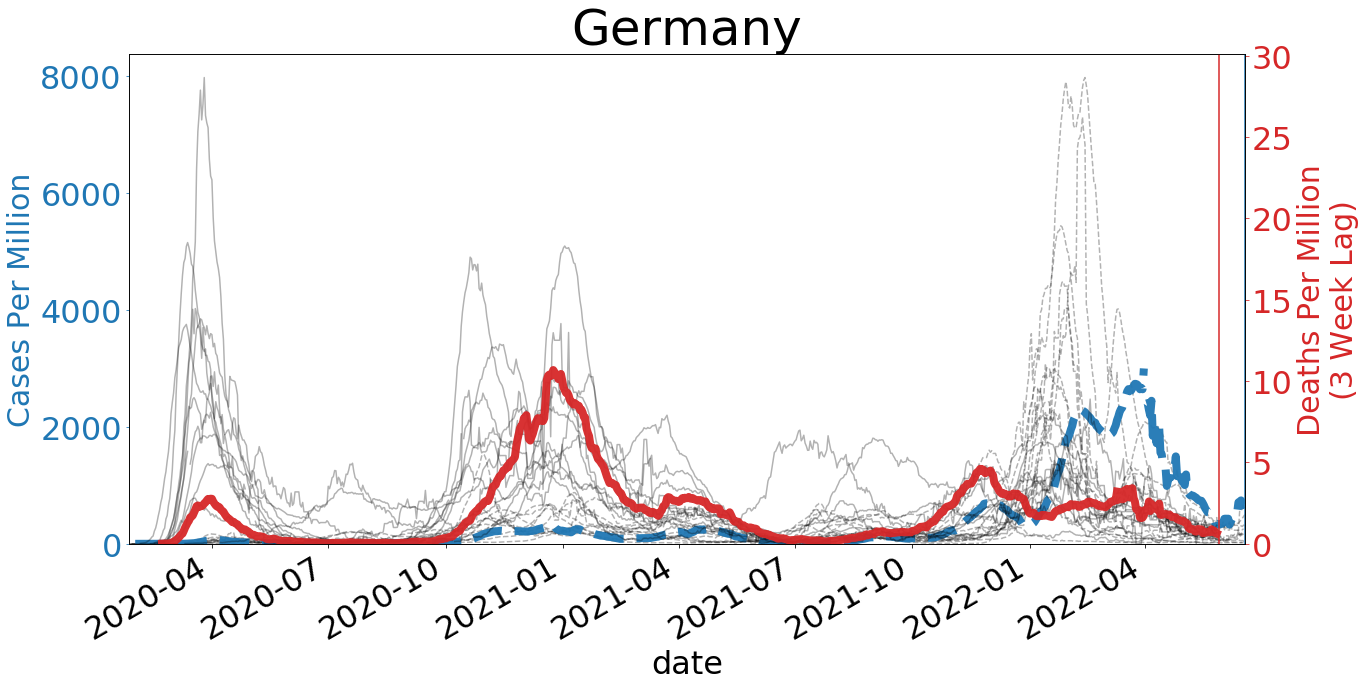

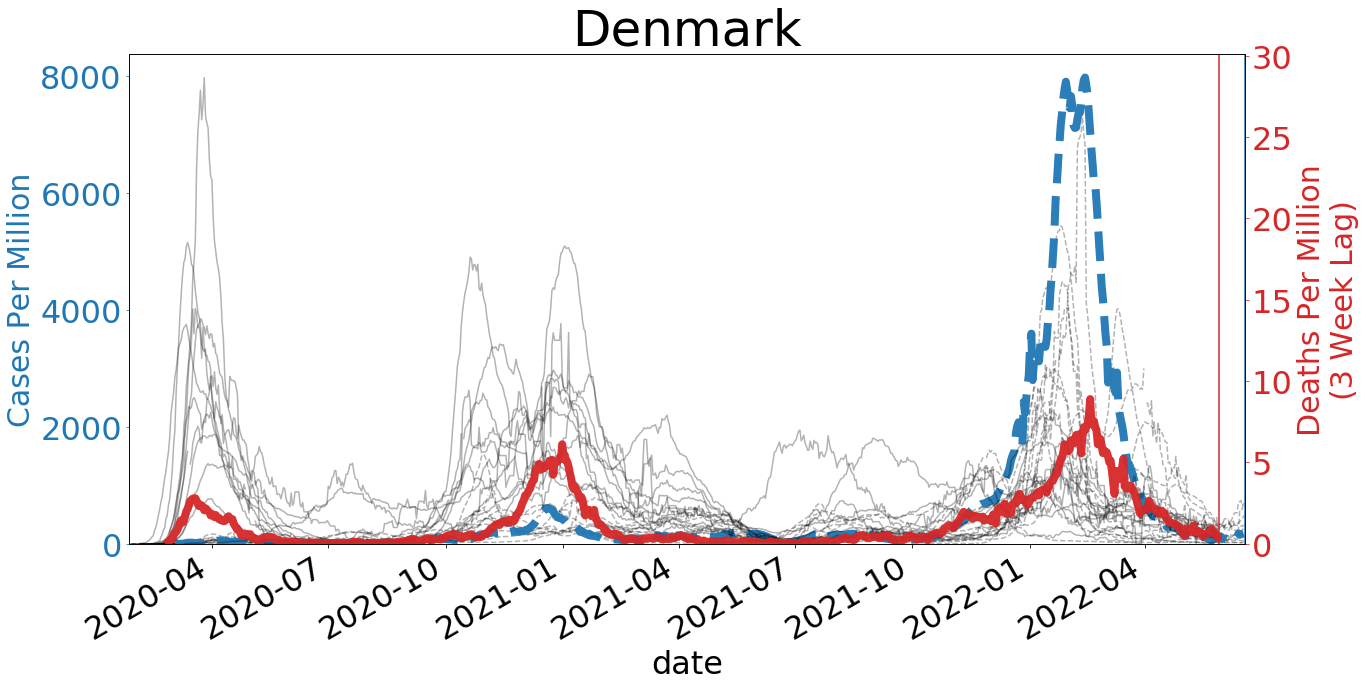

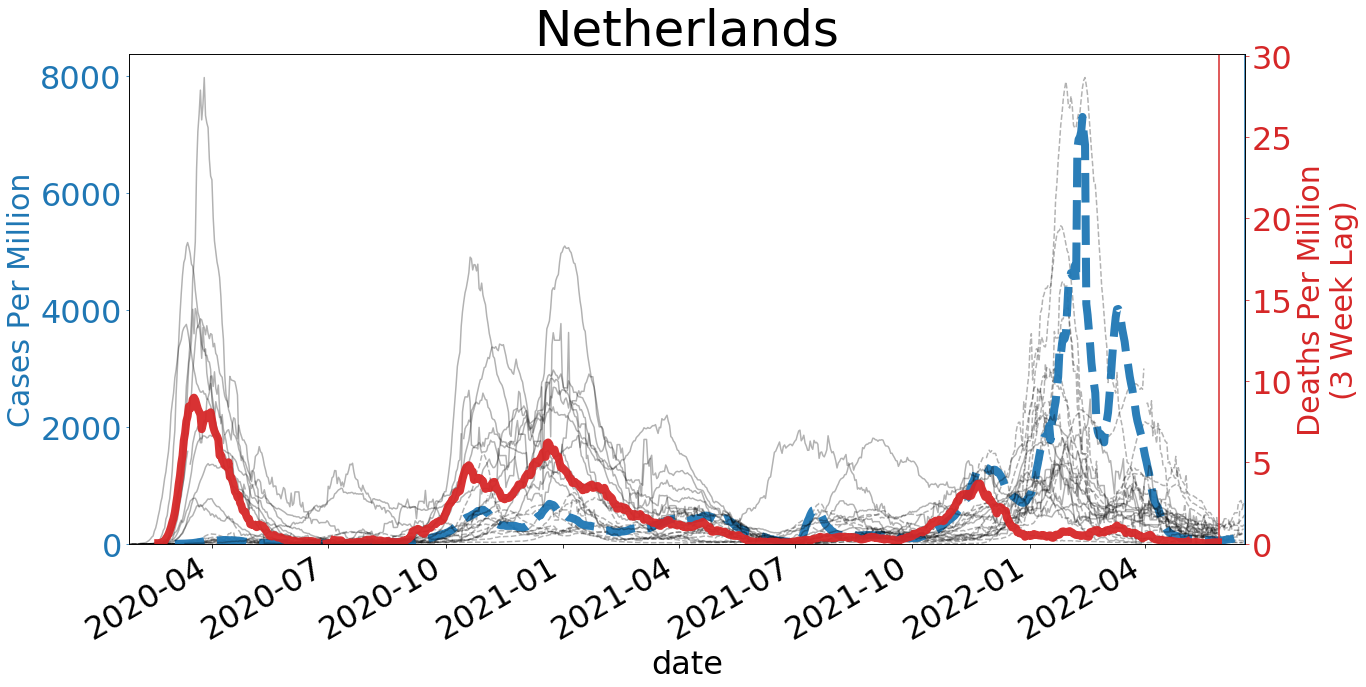

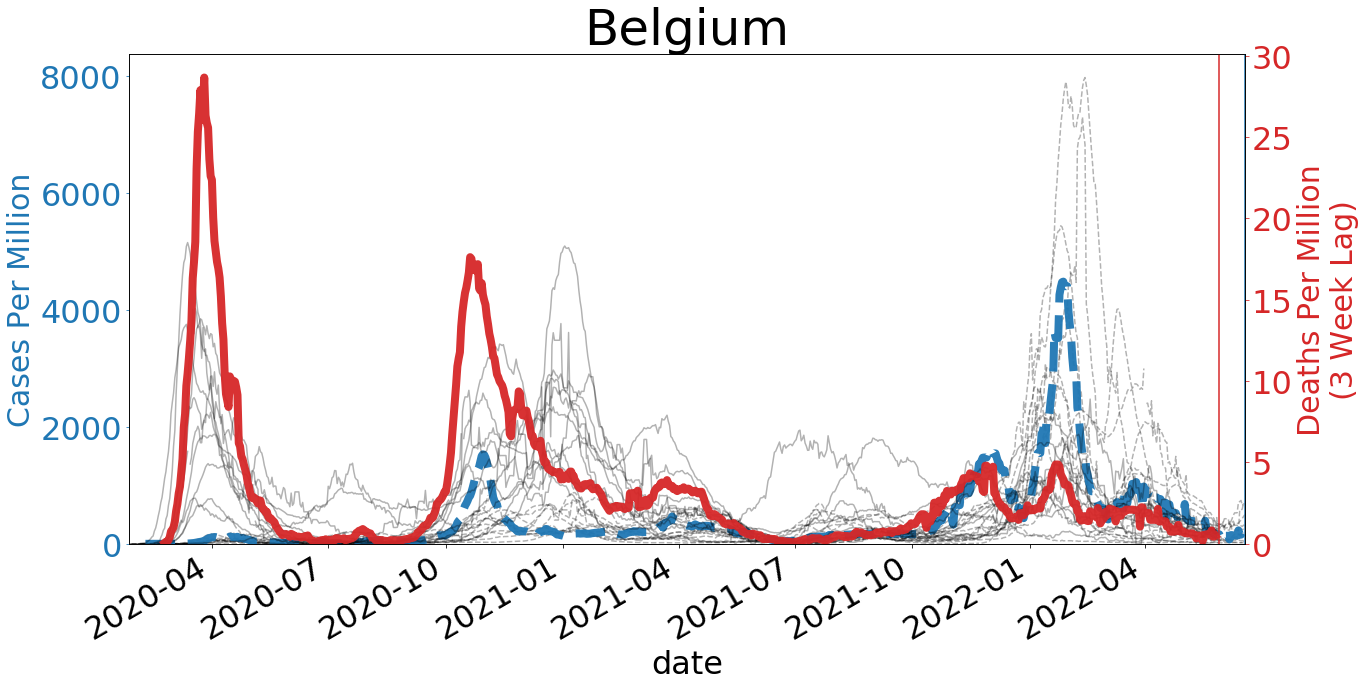

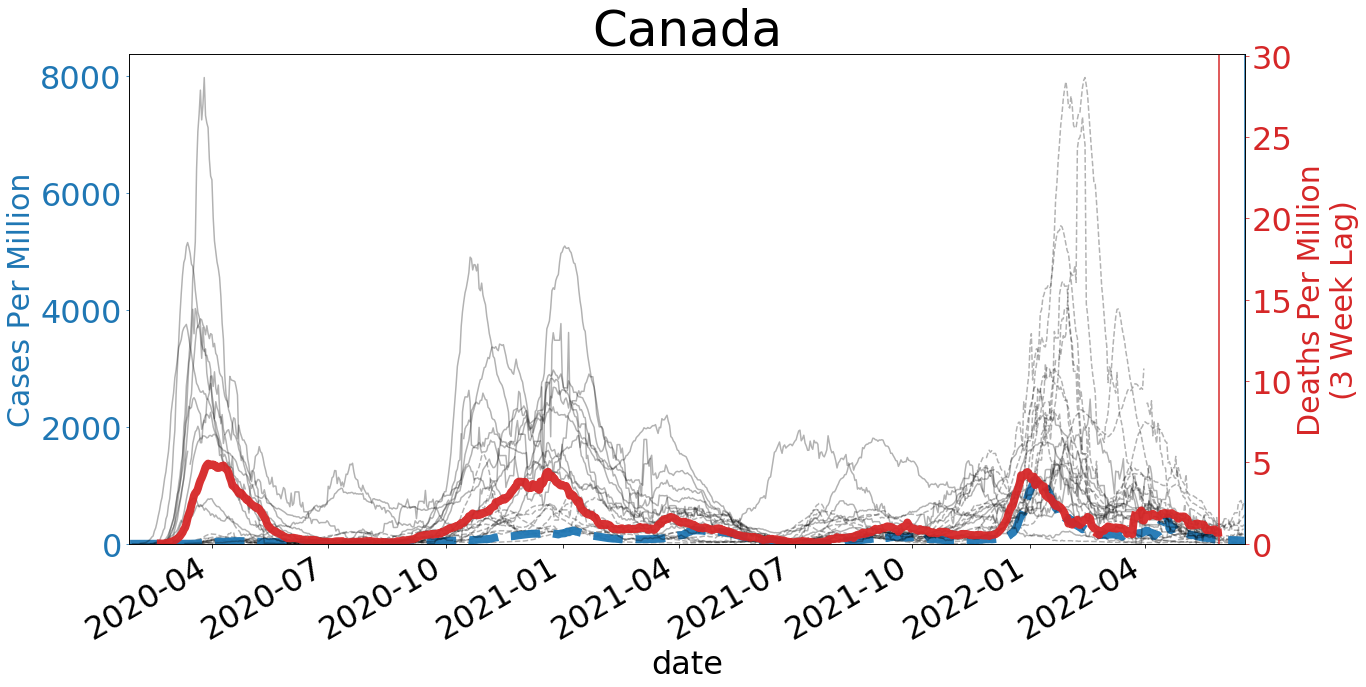

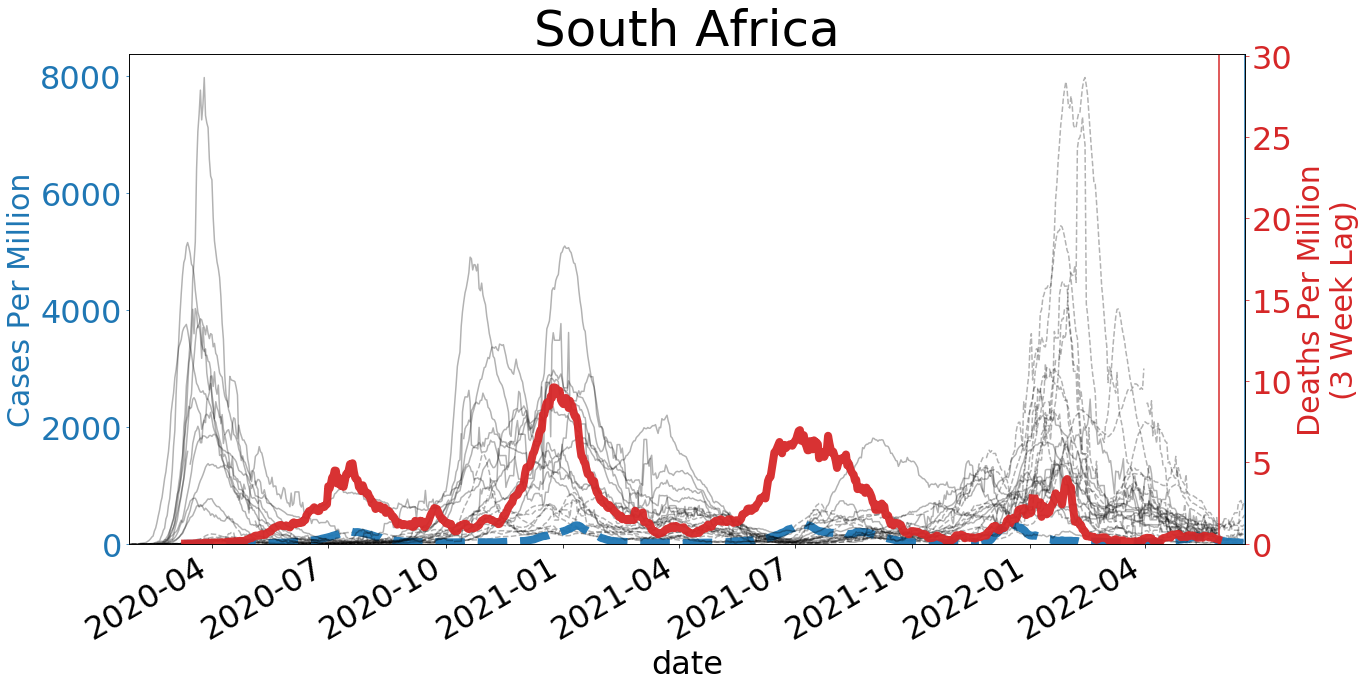

In [5]:
import copy
plt.rcParams.update({'font.size': 32})

plot_df = copy.copy(pivot_df)
plot_df["New Deaths Smoothed Per Million"] = plot_df["New Deaths Smoothed Per Million"].shift(-21)
plot_countries = ["GBR", "USA", "FRA", "ESP", "SWE", "ITA", "DEU","DNK", "NLD", "BEL", "CAN", "ZAF"]

for country in plot_countries:
    fig, ax = plt.subplots(figsize = (20, 10))
    ax.set_title(iso_to_country[country], fontsize = 50)
    ax2 = ax.twinx()
    for name in ["Cases", "Deaths"]:
        ls = "--" if name == "Cases" else "-"
        
        if name == "Deaths":
            a = ax2
        else:
            a = ax
        var_name = "New " + name + " Smoothed Per Million"
        other_countries = [c for c in plot_countries if c != country]
        plot_df[var_name][other_countries].plot.line(
            color = "k",
            alpha = .3,
            ls = ls,
            ax = a,
            legend = False)
        
    for name in ["Cases", "Deaths"]:
        var_name = "New " + name + " Smoothed Per Million"
        if name == "Deaths":
            a = ax2
            color = "C3"
            lag = "\n(3 Week Lag)"
        else:
            a = ax
            color = "C0"
            lag = ""
        ls = "--" if name == "Cases" else "-"
        plot_df[var_name][country].plot.line(
            ls = ls,
            ax=a,
            color = color,
            lw = 8,
            alpha = .95,
            legend = False)
        a.set_ylim(bottom = 0)
        a.set_ylabel(name + " Per Million" + lag, 
                     color = color,
                    fontsize = 30)
        a.tick_params(axis='y', colors=color)        
    a.axvline(plot_df[var_name][country].index[-1])
    a.axvline(plot_df[var_name][country].index[-21], color = "C3")
    a.set_xmargin(0)
    plt.show()

In [6]:
for iso, country in iso_to_country.items():
    print(country)

Aruba
Afghanistan
Angola
Anguilla
Albania
Andorra
United Arab Emirates
Argentina
Armenia
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Bonaire Sint Eustatius and Saba
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
Cote d'Ivoire
Cameroon
Democratic Republic of Congo
Congo
Cook Islands
Colombia
Comoros
Cape Verde
Costa Rica
Cuba
Curacao
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Western Sahara
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands
France
Faeroe Islands
Micronesia (country)
Gabon
United Kingdom
Georgia
Guernsey
Ghana
Gibraltar
Guinea
Gambia
Guinea-Bissau
Equatorial Guinea
Greece
Grenada
Greenland
Guatemala
Guam
Guyana
Hong Kong
Honduras
Croatia
Haiti
Hungary
Indonesia
Isle of Man
India
Ireland
Iran
Iraq
Iceland
Israel
Italy
Jamaica


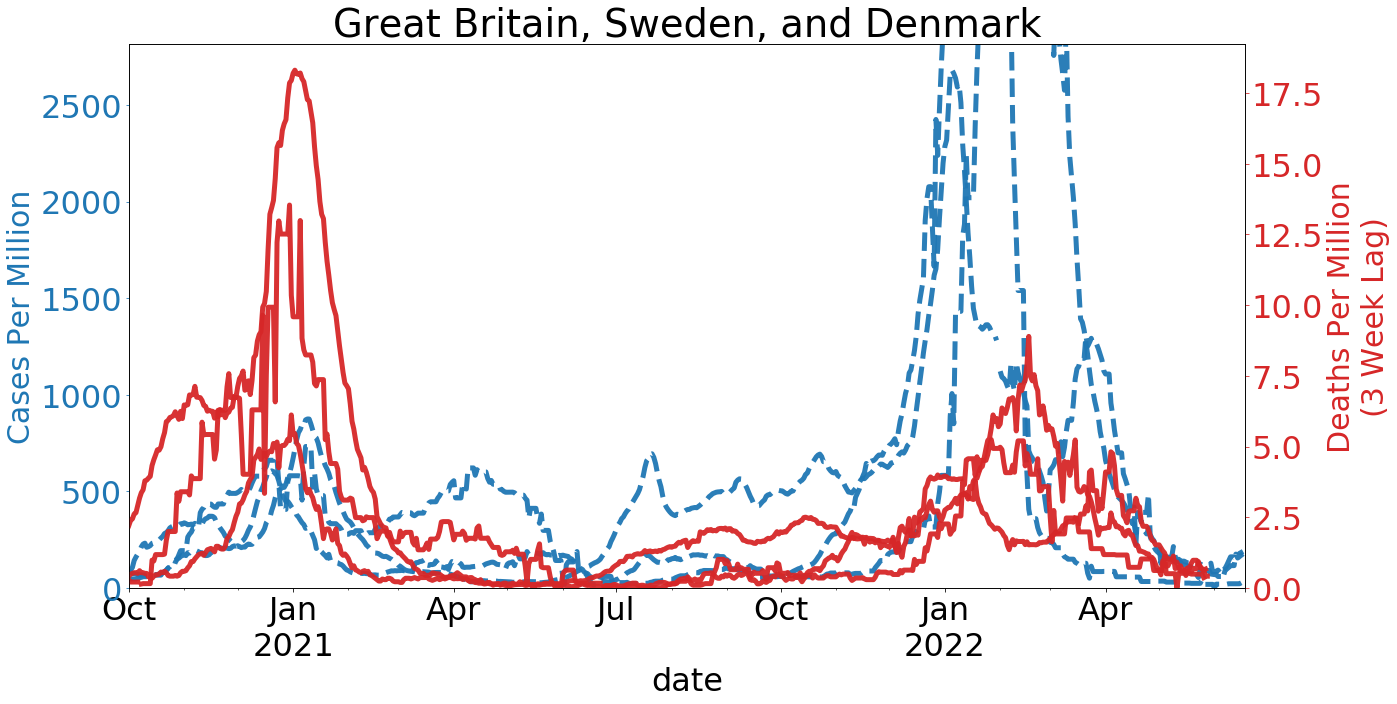

In [7]:
plot_countries = ["GBR", "SWE", "DNK"]

fig, ax = plt.subplots(figsize = (20, 10))
ax2 = ax.twinx()
for country in plot_countries:
#     ax.set_title(iso_to_country[country], fontsize = 50)
    for name in ["Cases", "Deaths"]:
        ls = "--" if name == "Cases" else "-"
        
        if name == "Deaths":
            a = ax2
        else:
            a = ax
        var_name = "New " + name + " Smoothed Per Million"
#         other_countries = [c for c in plot_countries if c != country]
#         plot_df[var_name][other_countries].plot.line(
#             color = "k",
#             alpha = .3,
#             ls = ls,
#             ax = a,
#             legend = False)
        
    for name in ["Cases", "Deaths"]:
        var_name = "New " + name + " Smoothed Per Million"
        if name == "Deaths":
            a = ax2
            color = "C3"
            lag = "\n(3 Week Lag)"
        else:
            a = ax
            color = "C0"
            lag = ""
        ls = "--" if name == "Cases" else "-"
        plot_df[var_name][country].loc["2020-10-01":].plot.line(
            ls = ls,
            ax=a,
            color = color,
            lw = 5,
            alpha = .95,
            legend = False)
        a.set_ylim(bottom = 0)
        a.set_ylabel(name + " Per Million" + lag, 
                     color = color,
                    fontsize = 30)
        a.tick_params(axis='y', colors=color)
        ax.set_xmargin(0)

ax.set_title("Great Britain, Sweden, and Denmark")
plt.show()

In [8]:
# plot_df["IRF"] = plot_df["New Deaths Smoothed Per Million"].div()
plot_df = copy.copy(pivot_df)
plot_df["IRF"] = pivot_df["New Deaths Smoothed Per Million"].copy()
pivot_df["New Deaths Smoothed Per Million"] = pivot_df["New Deaths Smoothed Per Million"].shift(-21)
plot_countries = ["GBR", "USA", "FRA", "ESP", "SWE", "ITA", "DEU","DNK", "NLD", "BEL", "CAN", "ZAF"]
for key in plot_df["New Deaths Smoothed Per Million"]:
    plot_df["IRF"][key] = plot_df["New Deaths Smoothed Per Million"][key].div(plot_df["New Cases Smoothed Per Million"][key])




(0, 0.11973273942093542)

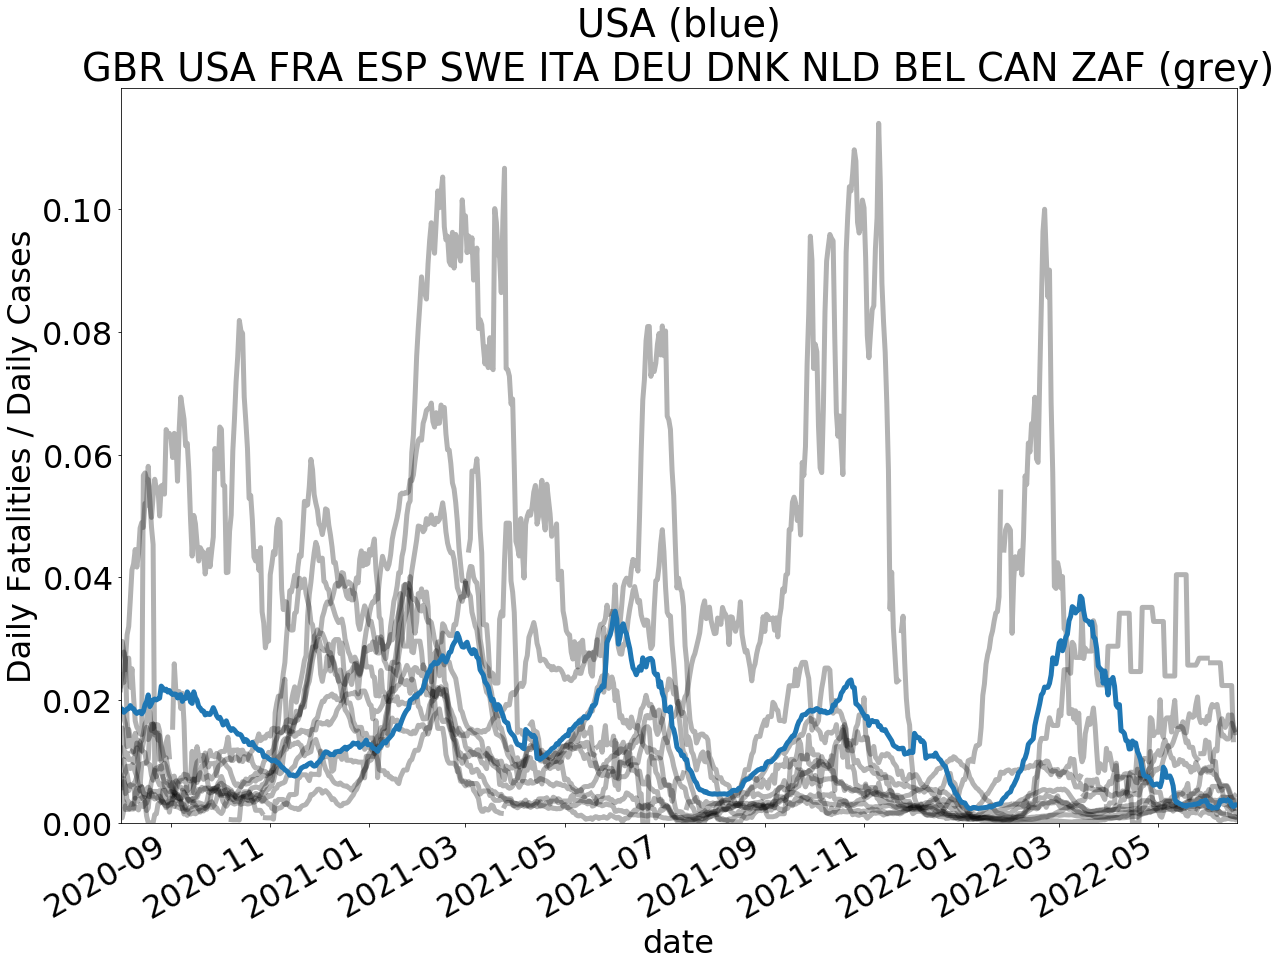

In [9]:
import datetime
fig, ax = plt.subplots(figsize =(20,15))
country = "USA"
other_countries = [c for c in plot_countries if c != country]
plot_df["IRF"].loc[datetime.datetime(2020,8,1):,other_countries].plot.line(
    color = "k",
    alpha = .3,
    linewidth = 5,
    ax = ax,
    legend = False)
plot_df["IRF"].loc[datetime.datetime(2020,8,1):,"USA"].plot(ax = ax, legend =  False,    linewidth = 5)
plt.title("USA (blue)\nGBR USA FRA ESP SWE ITA DEU DNK NLD BEL CAN ZAF (grey)")
ax.set_ylabel("Daily Fatalities / Daily Cases")
ax.set_ylim(0)
# other_countries = [c for c in plot_countries if c != country]
# plot_df[var_name][other_countries].plot.line(
#     color = "k",
#     alpha = .3,
#     ls = ls,
#     ax = a,
#     legend = False)

In [10]:
import datetime
plot_df["IRF"][datetime.datetime(2020,6,1):]

iso_code        ABW       AFG  AGO  AIA       ALB  AND       ARE       ARG  \
date                                                                         
2020-06-01      NaN  0.009882  0.0  NaN  0.007234  0.0  0.003679  0.018606   
2020-06-02      NaN  0.010709  0.0  NaN  0.000000  0.0  0.003406  0.016680   
2020-06-03      NaN  0.013920  0.0  NaN  0.000000  0.0  0.003409  0.015558   
2020-06-04      NaN  0.013156  0.0  NaN  0.000000  0.0  0.003336  0.018184   
2020-06-05      NaN  0.011868  0.0  NaN  0.000000  0.0  0.003128  0.019945   
...             ...       ...  ...  ...       ...  ...       ...       ...   
2022-06-14  0.00000  0.002553  NaN  0.0  0.000000  0.0  0.000000  0.000572   
2022-06-15  0.00289  0.002468  NaN  0.0  0.000000  0.0  0.000000       NaN   
2022-06-16  0.00289  0.006497  NaN  0.0  0.000000  NaN  0.000109       NaN   
2022-06-17  0.00325  0.005826  NaN  0.0  0.000000  NaN  0.000105       NaN   
2022-06-18      NaN  0.005499  NaN  0.0       NaN  NaN  0.000312       NaN   

iso_code         ARM       ATG  ...       VEN       VGB       VNM  VUT  WLF  \
date                            ...                                           
2020-06-01  0.021860  0.000000  ...  0.014499       NaN       NaN  NaN  NaN   
2020-06-02  0.025702  0.000000  ...  0.011566       NaN       NaN  NaN  NaN   
2020-06-03  0.026179  0.000000  ...  0.012788       NaN       NaN  NaN  NaN   
2020-06-04  0.020964  0.000000  ...  0.011867       NaN       NaN  NaN  NaN   
2020-06-05  0.020056  0.000000  ...  0.007778       NaN       NaN  NaN  NaN   
...              ...       ...  ...       ...       ...       ...  ...  ...   
2022-06-14  0.000000  0.012579  ...  0.005708  0.007300  0.000328  0.0  NaN   
2022-06-15  0.000000  0.012579  ...  0.005010  0.005682  0.000331  0.0  NaN   
2022-06-16  0.000000  0.007634  ...  0.004985  0.000000  0.000332  0.0  NaN   
2022-06-17  0.000000  0.000000  ...  0.001775  0.000000  0.000102  0.0  NaN   
2022-06-18  0.000000  0.000000  ...  0.001497  0.000000  0.000000  0.0  NaN   

iso_code         WSM       YEM       ZAF       ZMB       ZWE  
date                                                          
2020-06-01       NaN  0.329806  0.020855  0.000000  0.000000  
2020-06-02       NaN  0.253201  0.020017  0.000000  0.000000  
2020-06-03       NaN  0.256510  0.020710  0.000000  0.000000  
2020-06-04       NaN  0.263415  0.020247  0.000000  0.000000  
2020-06-05       NaN  0.247991  0.020935  0.000000  0.000000  
...              ...       ...       ...       ...       ...  
2022-06-14  0.002009       NaN  0.017300  0.001367  0.011626  
2022-06-15  0.002009       NaN  0.017583  0.002300  0.016507  
2022-06-16  0.001746       NaN  0.015810  0.001442  0.015196  
2022-06-17  0.001746  0.000000  0.015144  0.003150  0.020778  
2022-06-18  0.000000  0.000000       NaN       NaN       NaN  

[748 rows x 222 columns]